# set up environments

In [1]:
# set up spark
import sys
sys.path += ['/opt/apache-spark/python/lib/py4j-0.10.1-src.zip','/opt/apache-spark/python/lib/pyspark.zip']
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.getOrCreate()

# set up python
import matplotlib.pyplot as plt
%pylab inline

# set up rdkit
from rdkit import Chem
from rdkit.Chem import Draw

Populating the interactive namespace from numpy and matplotlib


# show table expir

In [2]:
expir = spark.read.parquet("outputs/04/expir")
expir.show()

+----------+-----+--------------------+--------+--------------------+
|       mid|index|                 vec|   state|          state_info|
+----------+-----+--------------------+--------+--------------------+
|   C135193|    0|[0.0036139488, 0....|     gas|                    |
|   C135206|    0|[0.0061153173, 0....|     gas|                    |
| C13524044|    0|[0.03707087, 0.09...|     gas|                    |
|C135306455|    0|[0.042747345, 0.0...|     gas|                    |
| C13532188|    0|[0.086738825, 0.0...|     gas|                    |
| C13532779|    0|[0.004134265, 0.0...|     gas|                    |
| C13551730|    0|[0.002783707, 0.0...|     gas|                    |
| C13552211|    0|[0.013432813, 0.0...|     gas|                    |
| C13552211|    1|[0.4314, 0.436, 0...|  liquid|              (NEAT)|
| C13553190|    0|[0.4486, 0.458800...|   solid|(1 mg / 650 mg KB...|
| C13558708|    0|[0.026320562, 0.0...|     gas|                    |
|   C135615|    0|[0

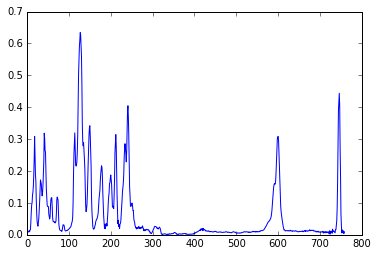

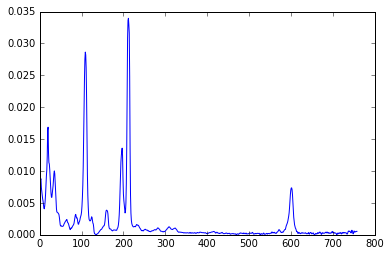

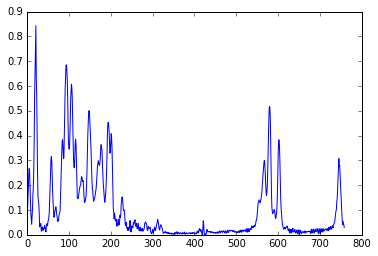

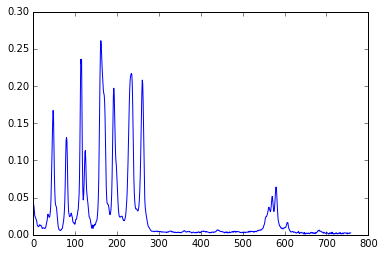

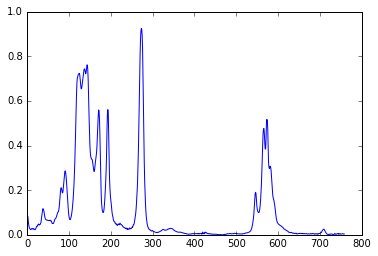

In [3]:
for i in expir.rdd.map(lambda x : x["vec"]).take(5):
    plt.plot(i)
    plt.show()

# show table mid_structure

In [4]:
midstruct = spark.read.parquet("outputs/03/mid_structure")
midstruct.show()

+----------+--------------------+
|       mid|              smiles|
+----------+--------------------+
| C13403377|            ClCC1CO1|
|  C6874448|   C=CC(=CCCC(=C)C)C|
|  B6001497|c1cnc2c(O[Mg]Oc3c...|
|  B6009678|C[NH+](C)c1ccccc1...|
|  B6002351|O=[N+]([O-])C=Cc1...|
|  B6008350|[NH3+]C(CCC(=O)NO...|
|   C100276|O=[N+]([O-])c1ccc...|
|   C102090|O=C(Oc1ccccc1)Oc1...|
|C104517046|C=C(C)c1ccc(Cl)cc1Cl|
|   C106923|         C=CCOCC1CO1|
|   C109308|CCCCCCCCCCCCCCCCC...|
|   C111922|           CCCCNCCCC|
|  C1144747|O=C(c1ccccc1)c1cc...|
|C116401991|O=P(Oc1ccc2ccccc2...|
|C116595143|CC(C)(C)c1ccc(OC(...|
|  C1195342|  CCc1nc(Cl)cc(Cl)n1|
|   C123751|             C1CCNC1|
|  C1323382|CCCCCCC(O)CC=CCCC...|
| C13907807|O=NN(CCCl)C(=O)N1...|
| C14442489|CCOC(=O)C(=C(CC)c...|
+----------+--------------------+
only showing top 20 rows



# show table thir

In [5]:
thir = spark.read.parquet("outputs/06/thir")
thir.show()

+--------------------+------------+--------------------+
|              smiles|      method|               freqs|
+--------------------+------------+--------------------+
|CCOc1ccc(Cl)cc1N(...|B3LYP/6-31G*|[[23.2942,0.7475]...|
|O=C1NC(c2ccccc2Cl...|B3LYP/6-31G*|[[18.7941,0.5832]...|
|O=C(COC(=O)c1cccc...|B3LYP/6-31G*|[[12.2118,0.7279]...|
|O=C(COC(=O)c1cccc...|B3LYP/6-31G*|[[10.5837,0.1164]...|
|O=C(COC(=O)c1cccc...|B3LYP/6-31G*|[[10.5759,0.1159]...|
|O=C(O)c1cccc(S(=O...|B3LYP/6-31G*|[[12.492,0.1121],...|
|CCOCCOC(=O)CCCCCC...|B3LYP/6-31G*|[[8.4892,0.0925],...|
|COC(=O)c1ccc([N+]...|B3LYP/6-31G*|[[43.3309,1.0047]...|
|O=S(=O)(O[K])c1cc...|B3LYP/6-31G*|[[36.4929,8.5142]...|
|     CC#N.COc1ccccc1|B3LYP/6-31G*|[[10.0716,0.7878]...|
|  NC(CCC(=O)O)C(=O)O|B3LYP/6-31G*|[[20.262,6.8048],...|
|COc1cccc2c(Cl)c3c...|B3LYP/6-31G*|[[53.8339,0.0431]...|
|CCCCCCCCCCCCCCC=C...|B3LYP/6-31G*|[[3.9376,0.2833],...|
|O=C(CNC(=O)c1cccc...|B3LYP/6-31G*|[[30.0258,5.8714]...|
|CN1CCC(C#N)(C2=CC...|B3LYP/6-3

# table universe are on hipergator
too large to copy to my laptop...

# example on relational algebra

## example 1

get the (structure,spectrum) pair that satisfies:
* gas phase
* has theoretical spectrum

In [6]:
expir.filter(expir["state"]=="gas")                   \
     .join(midstruct,expir["mid"]==midstruct["mid"])  \
     .join(thir,midstruct["smiles"]==thir["smiles"])  \
     .select(midstruct["smiles"],"vec")               \
     .show()

+--------------------+--------------------+
|              smiles|                 vec|
+--------------------+--------------------+
|     Oc1ccc2ccccc2c1|[0.0036139488, 0....|
|   N.O=NN(O)c1ccccc1|[0.0061153173, 0....|
|     CC(O)c1ccccc1Cl|[0.03707087, 0.09...|
|CCC(=O)c1cc(F)cc(...|[0.042747345, 0.0...|
|       CC(C)(CO)CCCN|[0.004134265, 0.0...|
|Cc1nn(C)c(Cl)c1[N...|[0.002783707, 0.0...|
|            CCC(O)CN|[0.013432813, 0.0...|
|    COC(=O)NC(=O)CCl|[0.026320562, 0.0...|
|Cc1ccccc1NC(=O)c1...|[0.0091764, 0.008...|
|c1ccc2c(c1)Nc1ccc...|[0.0012626052, 0....|
|  COc1ccc(OC)c(OC)c1|[0.030671, 0.0342...|
| CC(C)c1ccc2ncccc2c1|[0.047855735, 0.0...|
|Cc1cc([N+](=O)[O-...|[0.0057146745, 0....|
|CC(=O)c1ccc(Cl)c(...|[0.009871483, 0.0...|
|NN=C1c2ccccc2c2cc...|[0.015127636, 0.0...|
|   CCc1ccc(CC)c(C)c1|[2.0718575E-4, 2....|
|O=C(Oc1cccc(O)c1)...|[0.044987388, 0.0...|
|  N#Cc1c(F)ccc(F)c1F|[0.0021691772, 0....|
|  CCCCOC(=O)c1ccccc1|[0.07298988, 0.10...|
| CC(O)CSc1ccc(Cl)cc1|[0.0022265